In [14]:
import tensorflow as tf
import keras

In [15]:
import os
from PIL import Image
import numpy as np

In [16]:
filenames = []
labels = []
for file in os.listdir('forest_data/Data/Train_Data/Fire'):
    filenames.append(os.path.join('Fire', file))
    labels.append('Fire')

print(len(labels))
print(filenames[:10])
print(labels[:10])

2065
['Fire/.ipynb_checkpoints', 'Fire/F_2498.jpg', 'Fire/F_2497.jpg', 'Fire/F_2493.jpg', 'Fire/F_2496.jpg', 'Fire/F_2489.jpg', 'Fire/F_2495.jpg', 'Fire/F_2490.jpg', 'Fire/F_2491.jpg', 'Fire/F_2488.jpg']
['Fire', 'Fire', 'Fire', 'Fire', 'Fire', 'Fire', 'Fire', 'Fire', 'Fire', 'Fire']


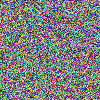

In [17]:
img_data = np.random.random(size=(100, 100, 3))
img = tf.keras.preprocessing.image.array_to_img(img_data)
array = tf.keras.preprocessing.image.img_to_array(img)
img.show()

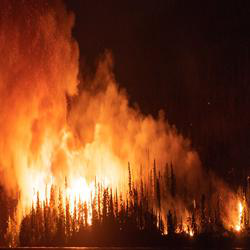

In [18]:
image = Image.open("forest_data/Data/Train_Data/Fire/F_0.jpg")
image.show()

In [19]:
rmdir forest_data/Data/Train_Data/'.ipynb_checkpoints'

rmdir: failed to remove 'forest_data/Data/Train_Data/.ipynb_checkpoints': No such file or directory


In [20]:
all_data = tf.keras.preprocessing.image_dataset_from_directory(
    "forest_data/Data/Train_Data/",
    labels="inferred",
    label_mode="binary",
    class_names=['Fire', 'Non_Fire'],
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    #crop_to_aspect_ratio=False,
)

Found 4520 files belonging to 2 classes.


In [21]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  "forest_data/Data/Train_Data/",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(256, 256),
  batch_size=32
  )
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  "forest_data/Data/Train_Data/",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(256, 256),
  batch_size=32
  )

Found 4520 files belonging to 2 classes.
Using 3616 files for training.
Found 4520 files belonging to 2 classes.
Using 904 files for validation.


In [22]:
train_ds.class_names

['Fire', 'Non_Fire']

In [38]:
print(train_ds)

<BatchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>


In [39]:
for data in enumerate(train_ds):
    print(data)

(0, (<tf.Tensor: shape=(32, 256, 256, 3), dtype=float32, numpy=
array([[[[1.48000000e+02, 1.32000000e+02, 2.03000000e+02],
         [1.48000000e+02, 1.32000000e+02, 2.03000000e+02],
         [1.48000000e+02, 1.32000000e+02, 2.03000000e+02],
         ...,
         [1.46117188e+02, 1.33117188e+02, 2.05117188e+02],
         [1.48000000e+02, 1.35000000e+02, 2.07000000e+02],
         [1.48000000e+02, 1.35000000e+02, 2.07000000e+02]],

        [[1.46070312e+02, 1.30070312e+02, 2.01070312e+02],
         [1.46070312e+02, 1.30070312e+02, 2.01070312e+02],
         [1.46070312e+02, 1.30070312e+02, 2.01070312e+02],
         ...,
         [1.46060654e+02, 1.33060654e+02, 2.05060654e+02],
         [1.47035156e+02, 1.34035156e+02, 2.06035156e+02],
         [1.47035156e+02, 1.34035156e+02, 2.06035156e+02]],

        [[1.44117188e+02, 1.28117188e+02, 1.99117188e+02],
         [1.45025497e+02, 1.29025497e+02, 2.00025497e+02],
         [1.45058594e+02, 1.29058594e+02, 2.00058594e+02],
         ...,
     

In [43]:
model = tf.keras.applications.InceptionV3(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=(256,256,3),
    pooling=None,
    classes=2,
    classifier_activation="softmax",
)

In [46]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss="sparse_categorical_crossentropy", # binary_crossentropy threw an error, maybe categorial_crossentropy would be better, but sparse fixed the issue
    metrics=["accuracy"],
)

In [47]:
# all_data needs to be split for fit
model.fit(train_ds, epochs=10, callbacks=None, validation_data=val_ds)

Epoch 1/10
113/113 [==============================] - 936s 8s/step - loss: 0.3131 - accuracy: 0.8816 - val_loss: 0.4885 - val_accuracy: 0.8850
Epoch 2/10
100/113 [=========================>....] - ETA: 1:40 - loss: 0.1901 - accuracy: 0.9306

KeyboardInterrupt: 

In [48]:
def create_model(pooling = False, act = "softmax"):
    model = tf.keras.applications.InceptionV3(
        include_top=True,
        weights=None,
        input_tensor=None,
        input_shape=(256,256,3),
        pooling=pooling,
        classes=2,
        classifier_activation=act)
    return model


In [52]:
def model_stuff(train_ds, val_ds, ep=10, create = False, model = None, lr=0.001, pooling = False, act = "softmax"):
    # if necessary or wanted create model
    if create == True or model is None:
        model = create_model(pooling, act)
        
    # compile models TODO: play with loss function, find out why sparse is the only one withour an error
    modelAdam = tf.keras.models.clone_model(model)
    modelAdam.compile(
        optimizer=tf.keras.optimizers.Adam(1e-3),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])
    
    modelSGD = tf.keras.models.clone_model(model)
    modelSGD.compile(
        optimizer=tf.keras.optimizers.SGD(learning_rate=lr), #idea:learning rate schedule (tf.keras.optimizers.schedules.LearningRateSchedule) so it starts with 0.01 and gets smaller over time
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])
    
    modelRMSprop = tf.keras.models.clone_model(model)
    modelRMSprop.compile(
        tf.keras.optimizers.RMSprop(learning_rate=lr), # momentum could be played with \o/
        loss="sparse_categorial_crossentropy",
        metrics=["accuracy"])
    
    # fit the different models :D
    print("modelAdam")
    modelAdam.fit(train_ds, epochs= ep, callbacks=None, validation_data=val_ds)
    print("modelSGD")
    modelSGD.fit(train_ds, epochs= ep, callbacks=None, validation_data=val_ds)
    print("modelRMSprop")
    modelRMSprop.fit(train_ds, epochs= ep, callbacks=None, validation_data=val_ds)
    
    return model #could return the trained models -> returning unchanged one now!

In [ ]:
model_stuff(train_ds, val_ds, ep=1)

modelAdam
113/113 [==============================] - 931s 8s/step - loss: 0.3566 - accuracy: 0.8800 - val_loss: 0.8466 - val_accuracy: 0.9093
modelSGD
113/113 [==============================] - ETA: 0s - loss: 0.5490 - accuracy: 0.7636